#Definicion Del Problema
Se tiene un galpón en el cual se desea controlar la humedad y la temperatura (sensación térmica) controlando la velocidad de giro de un ventilador.


In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=6c9b7d5da8863167753791def9ec18286e15a6038826103e871c98478c7c45f5
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Declarar universo de discurso
#Temperatura del galpón
temperatura = ctrl.Antecedent(np.arange(0,61,1), 'temperatura')
#humedad del galpón
humedad = ctrl.Antecedent(np.arange(10,101,1), 'humedad')
#velocidad del motor del ventilador
vel_motor = ctrl.Consequent(np.arange(0,61,1), 'vel_motor')

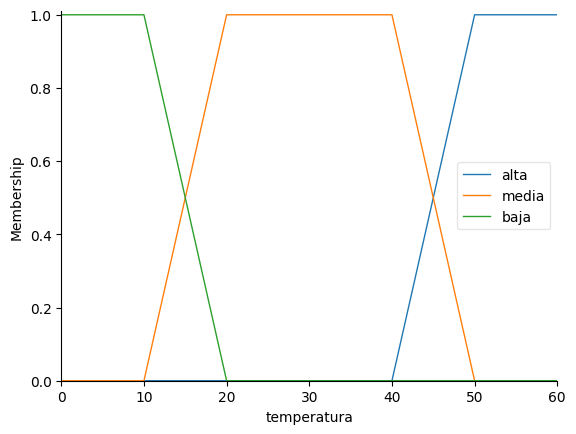

In [4]:
#Crear Conjuntos borrosos
#Temperatura del galpón
temperatura['alta'] = skfuzzy.trapmf(temperatura.universe, [40,50,60,60])
temperatura['media'] = skfuzzy.trapmf(temperatura.universe, [10,20,40,50])
temperatura['baja'] = skfuzzy.trapmf(temperatura.universe, [0,0,10,20])
temperatura.view()
plt.show()

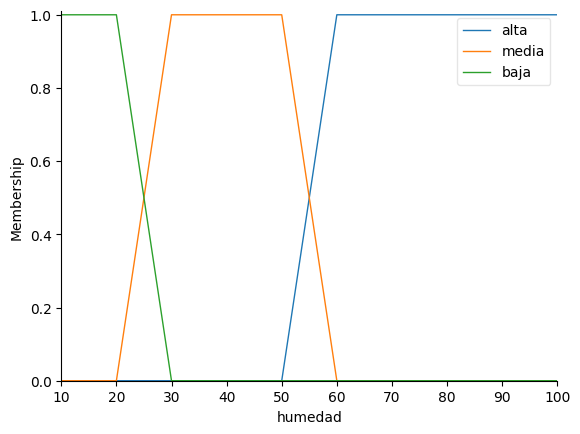

In [5]:
#Crear Conjuntos borrosos
#humedad del galpón
humedad['alta'] = skfuzzy.trapmf(humedad.universe, [50,60,100,100])
humedad['media'] = skfuzzy.trapmf(humedad.universe, [20,30,50,60])
humedad['baja'] = skfuzzy.trapmf(humedad.universe, [10,10,20,30])
humedad.view()
plt.show()

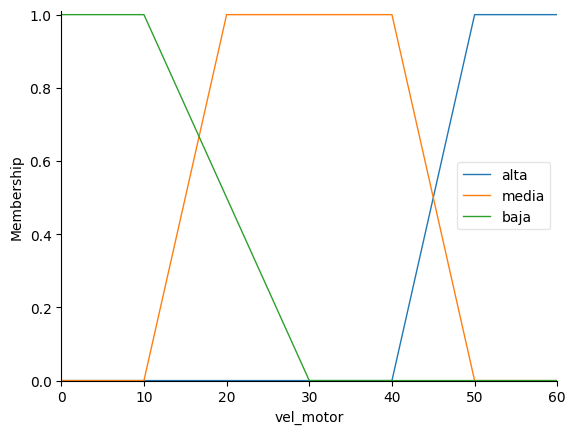

In [6]:
#Crear Conjuntos borrosos
#vel_motor del ventilador
vel_motor['alta'] = skfuzzy.trapmf(vel_motor.universe, [40,50,60,60])
vel_motor['media'] = skfuzzy.trapmf(vel_motor.universe, [10,20,40,50])
vel_motor['baja'] = skfuzzy.trapmf(vel_motor.universe, [0,00,10,30])
vel_motor.view()
plt.show()

In [7]:
#Motor de reglas o motor de inferencia
regla1 = ctrl.Rule(temperatura['alta'] & humedad['alta'], vel_motor['media'])
regla2 = ctrl.Rule(temperatura['alta'] & humedad['media'], vel_motor['media'])
regla3 = ctrl.Rule(temperatura['alta'] & humedad['baja'], vel_motor['alta'])
regla4 = ctrl.Rule(temperatura['media'] & humedad['alta'], vel_motor['media'])
regla5 = ctrl.Rule(temperatura['media'] & humedad['media'], vel_motor['baja'])
regla6 = ctrl.Rule(temperatura['media'] & humedad['baja'], vel_motor['baja'])
regla7 = ctrl.Rule(temperatura['baja'] & humedad['alta'], vel_motor['baja'])
regla8 = ctrl.Rule(temperatura['baja'] & humedad['media'], vel_motor['baja'])
regla9 = ctrl.Rule(temperatura['baja'] & humedad['baja'], vel_motor['baja'])

In [8]:
#Activar el motor de inferencia
controlGalpon = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9])

In [10]:
#Implementar ejercicio 1
#Velocidad = 515
#Ángulo = -2.5
velocidad_ventilador = ctrl.ControlSystemSimulation(controlGalpon)
velocidad_ventilador.input['temperatura'] = 515
velocidad_ventilador.input['humedad'] = -2.5
velocidad_ventilador.compute()

In [11]:
velocidad_ventilador.output['vel_motor']

52.22222222222222

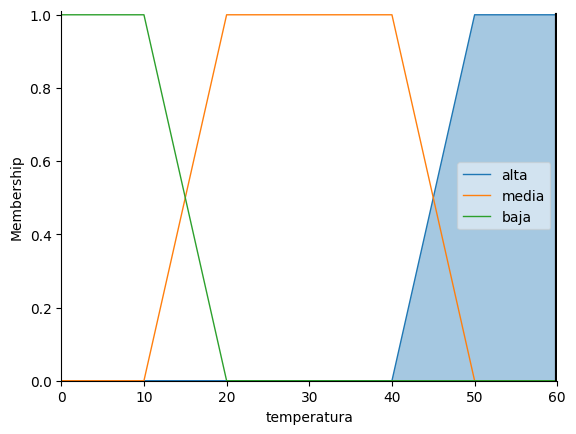

In [12]:
temperatura.view(sim = velocidad_ventilador)
plt.show()

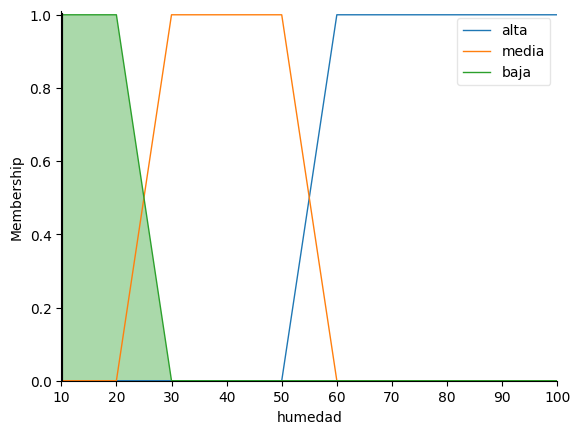

In [13]:
humedad.view(sim = velocidad_ventilador)
plt.show()

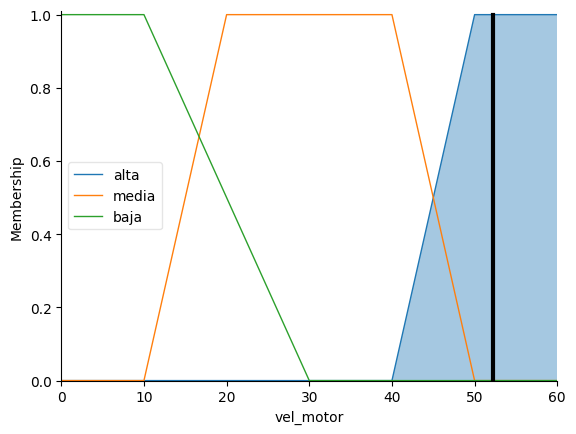

In [14]:
vel_motor.view(sim = velocidad_ventilador)
plt.show()